C:\Users\bumbl\AppData\Local\Temp\ipykernel_14240\161081734.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=popular_movies, palette='muted')


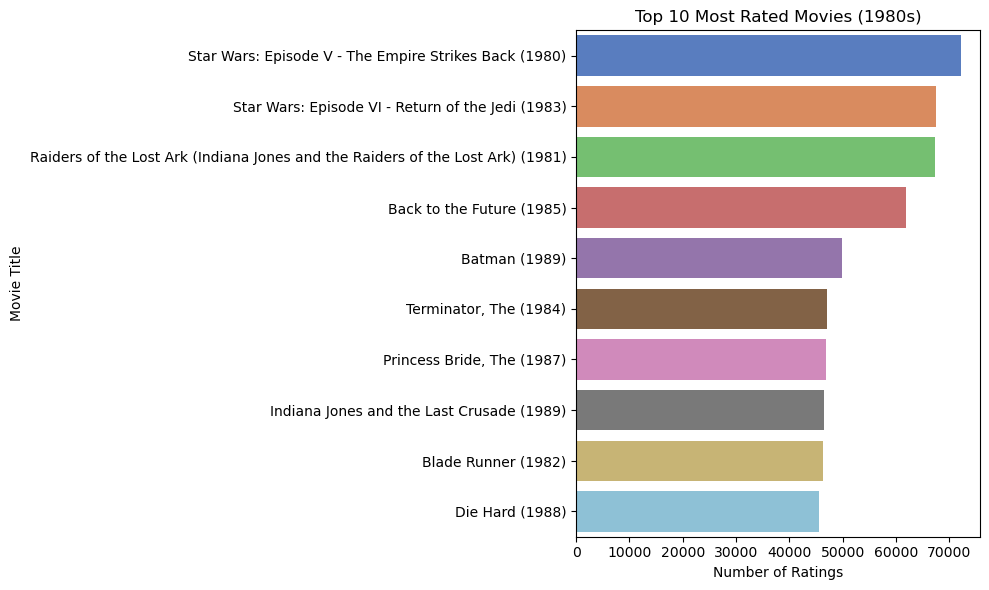

C:\Users\bumbl\AppData\Local\Temp\ipykernel_14240\161081734.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=popular_movies, palette='muted')


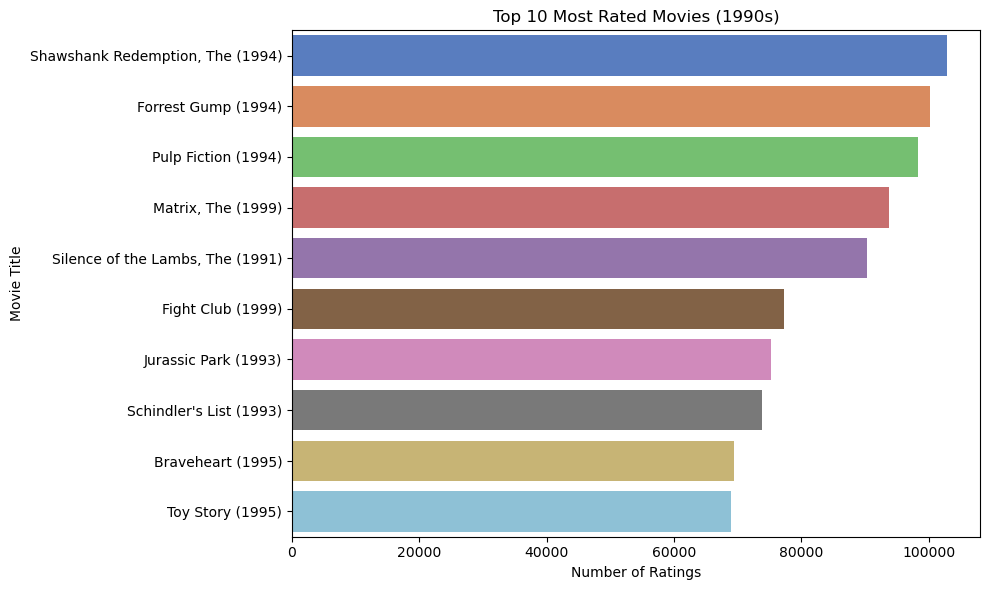

C:\Users\bumbl\AppData\Local\Temp\ipykernel_14240\161081734.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=popular_movies, palette='muted')


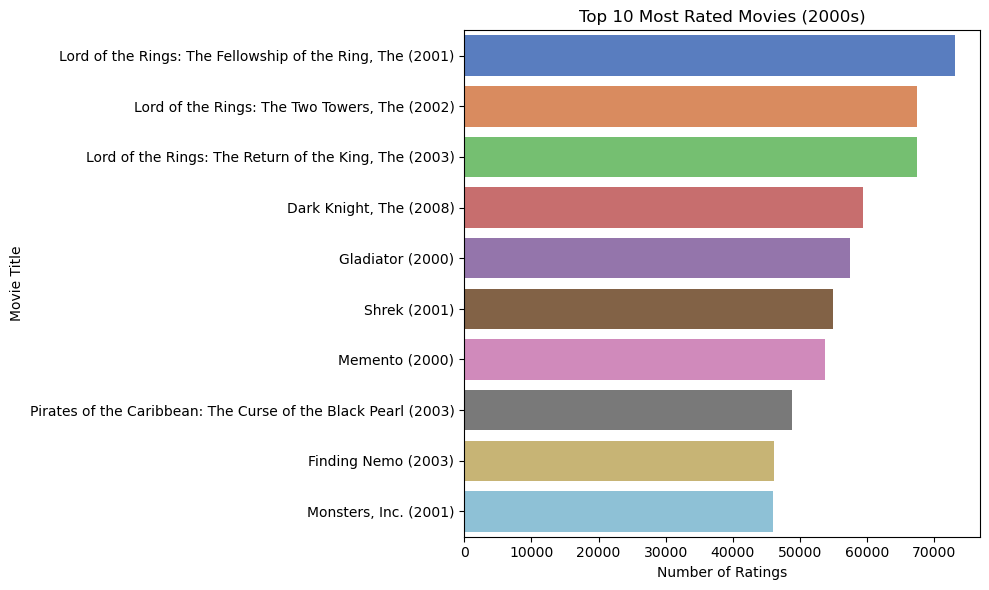

C:\Users\bumbl\AppData\Local\Temp\ipykernel_14240\161081734.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='title', data=popular_movies, palette='muted')


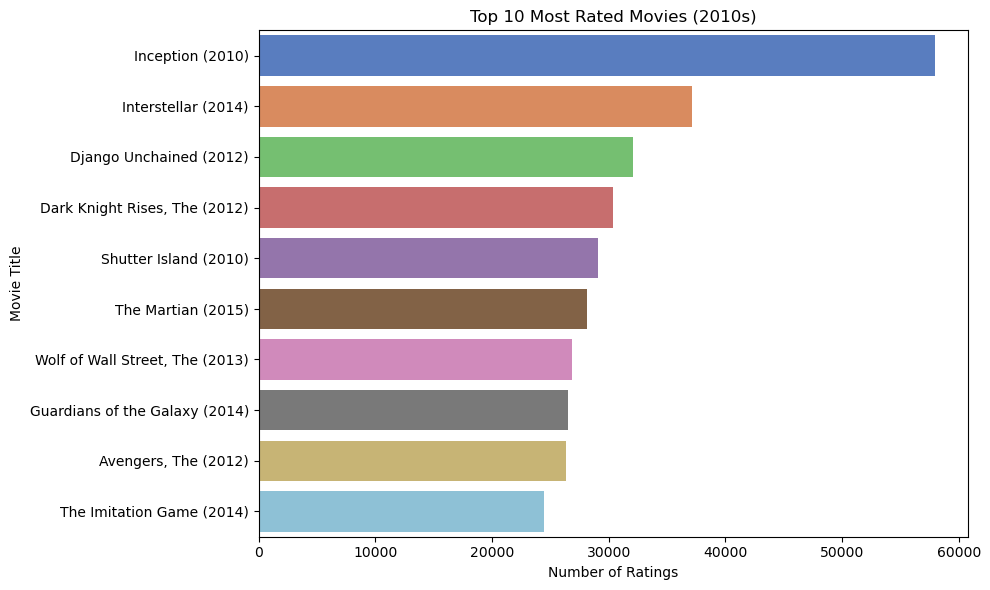

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Extract the release year from the movie title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

# Merge ratings and movies datasets
data = ratings.merge(movies, on='movieId')

# Function to filter movies by decade
def filter_by_decade(data, start_year, end_year):
    # Filter by year range
    filtered_data = data[(data['year'] >= start_year) & (data['year'] <= end_year)]
    
    # Group by movie and calculate popularity metrics
    popular_movies = (
        filtered_data.groupby('title')
        .agg({'rating': ['count', 'mean']})
        .reset_index()
    )
    popular_movies.columns = ['title', 'rating_count', 'average_rating']
    popular_movies = popular_movies.sort_values(by='rating_count', ascending=False)
    return popular_movies

# Decade ranges to analyze
decades = {
    "1980s": (1980, 1989),
    "1990s": (1990, 1999),
    "2000s": (2000, 2009),
    "2010s": (2010, 2020)
}

# Loop through decades and visualize
for decade, (start, end) in decades.items():  # Correct loop syntax
    popular_movies = filter_by_decade(data, start, end).head(10)
    
    # Plot the top 10 movies for the decade
    plt.figure(figsize=(10, 6))
    sns.barplot(x='rating_count', y='title', data=popular_movies, hue="title", palette='muted')
    plt.title(f'Top 10 Most Rated Movies ({decade})')
    plt.xlabel('Number of Ratings')
    plt.ylabel('Movie Title')
    plt.tight_layout()
    plt.show()
